# Assignment 2

# Setup & Imports

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

# Part 1: Parameter Analysis Function

In [102]:
def sird_model(y, t, beta, gamma, mu):
    """
    SIRD model differential equations

    Parameters:
    - y: [S, I, R, D] populations at time t
    - beta: transmission rate
    - gamma: recovery rate
    - mu: mortality rate

    Returns:
    - [dS/dt, dI/dt, dR/dt, dD/dt]
    """
    S, I, R, D = y 
    N = S + I + R + D

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - ( gamma + mu ) * I
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

In [132]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """

    # initial conditions
    S0 = N - I0 # initial susceptible individuals are all the people in population who are not yet infected
    R0 = 0 # initially there is no one who already recovered
    D0 = 0 # initially there are no dead people
    y0 = [S0, I0, R0, D0] # initial state
    t = np.linspace(0, simulation_days, simulation_days+1) # create one time step per day
    
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25] # test recovery rates
    results = []

    fig, axes = plt.subplots(1, len(gamma_values), figsize=(20, 5), sharey=True) # create an empty figure for the plots of different gamma values (formatted to share one y-axis)

    for id, gamma in enumerate(gamma_values):
        
        sol = odeint(sird_model, y0, t, args = (beta, gamma, mu)) # solve the SIRD equations over time
        S, I, R, D = sol.T # transpose the solution to save each section separately

        peak_infected = np.max(I)
        peak_day = np.argmax(I) # since we have one value for every day
        total_deaths = D[-1] # last D will be a number of cumulative deaths over the simulation time period
        R0 = beta / (gamma + mu) # basic reproduction number for the SIRD model

        results.append({
            'gamma': gamma,
            'R0': round(R0, 2),
            'peak_infected': round(peak_infected, 0), # infected people are treated as whole
            'peak_day': peak_day,
            'total_deaths': round(total_deaths, 0) # dead people are treated as whole
        })

        # plot the figures in corresponding subplots (each id represents a graph of a different recovery rate)
        ax = axes[id]
        ax.plot(t, S, label='Susceptible', color='blue', linewidth=2)
        ax.plot(t, I, label='Infected', color='orange', linewidth=2)
        ax.plot(t, R, label='Recovered', color='green', linewidth=2)
        ax.plot(t, D, label='Deceased', color='black', linewidth=2)

        ax.set_xlabel('Days')
        ax.set_title(f'γ={gamma}', fontsize=12, fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.6)

        if id == 0:  # add y-label only to first subplot
            ax.set_ylabel('Individuals')

    # add legend to the last subplot
    axes[-1].legend(loc='best', fontsize=8)

    plt.suptitle('SIRD Epidemic Model for Different Recovery Rates', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    df = pd.DataFrame(results)
    return df    

# Part 2: Scenario Comparison

### Scenario A - High Transmission

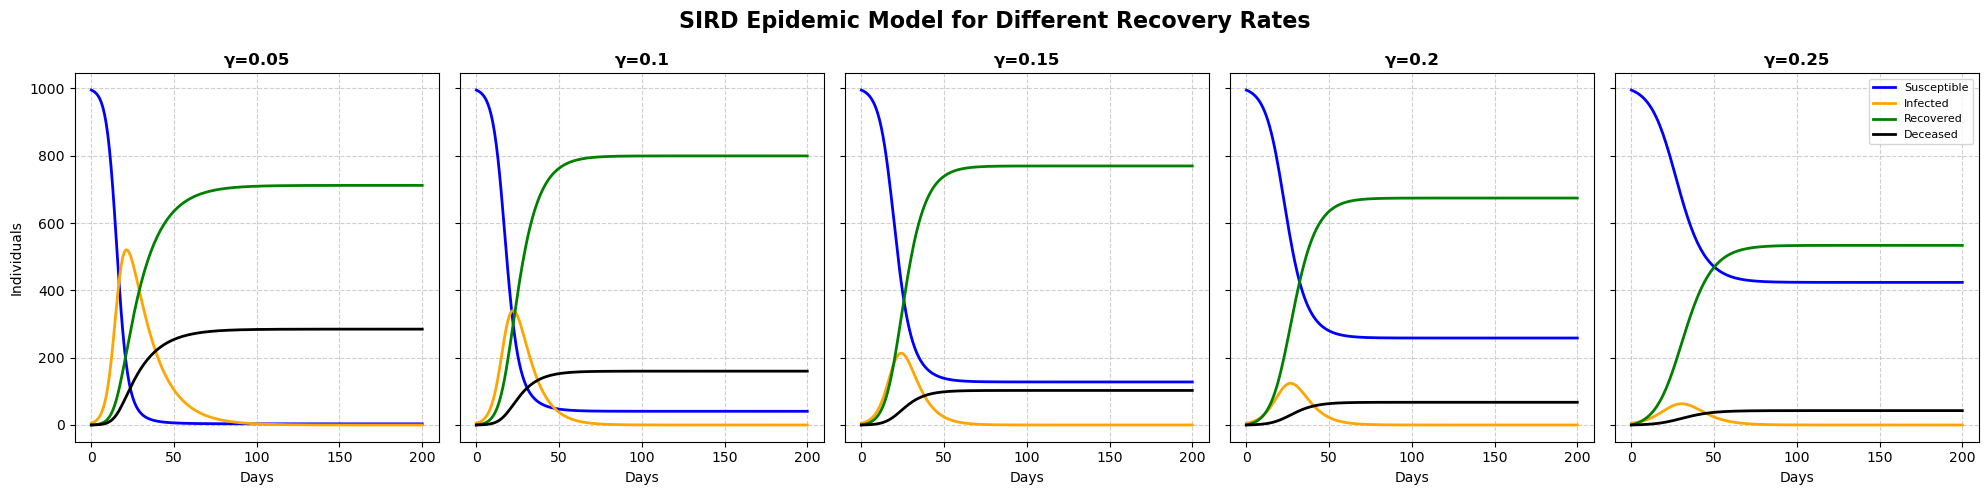

In [133]:
df_scenarioA = analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)

### Scenario B - Low Transmission

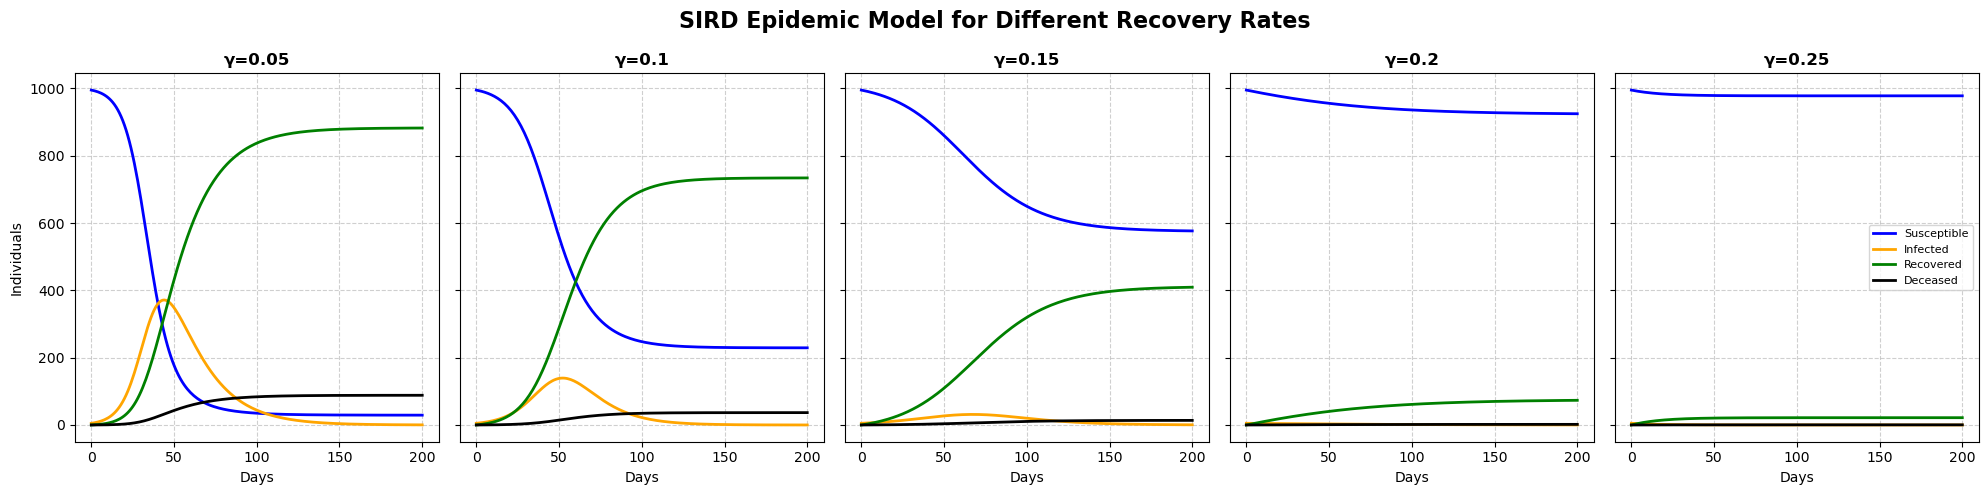

In [134]:
df_scenarioB = analyze_recovery_rates(beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200)

In [108]:
print("Scenario A - High Transmission")
df_scenarioA

Scenario A - High Transmission


gamma    R0  peak_infected  peak_day  total_deaths
0   0.05  5.71          521.0        21         285.0
1   0.10  3.33          340.0        22         160.0
2   0.15  2.35          213.0        24         103.0
3   0.20  1.82          124.0        27          67.0
4   0.25  1.48           63.0        30          43.0

In [109]:
print("Scenario B - Low Transmission")
df_scenarioB

Scenario B - Low Transmission


gamma    R0  peak_infected  peak_day  total_deaths
0   0.05  3.64          371.0        44          88.0
1   0.10  1.90          139.0        52          37.0
2   0.15  1.29           31.0        67          14.0
3   0.20  0.98            5.0         0           2.0
4   0.25  0.78            5.0         0           0.0

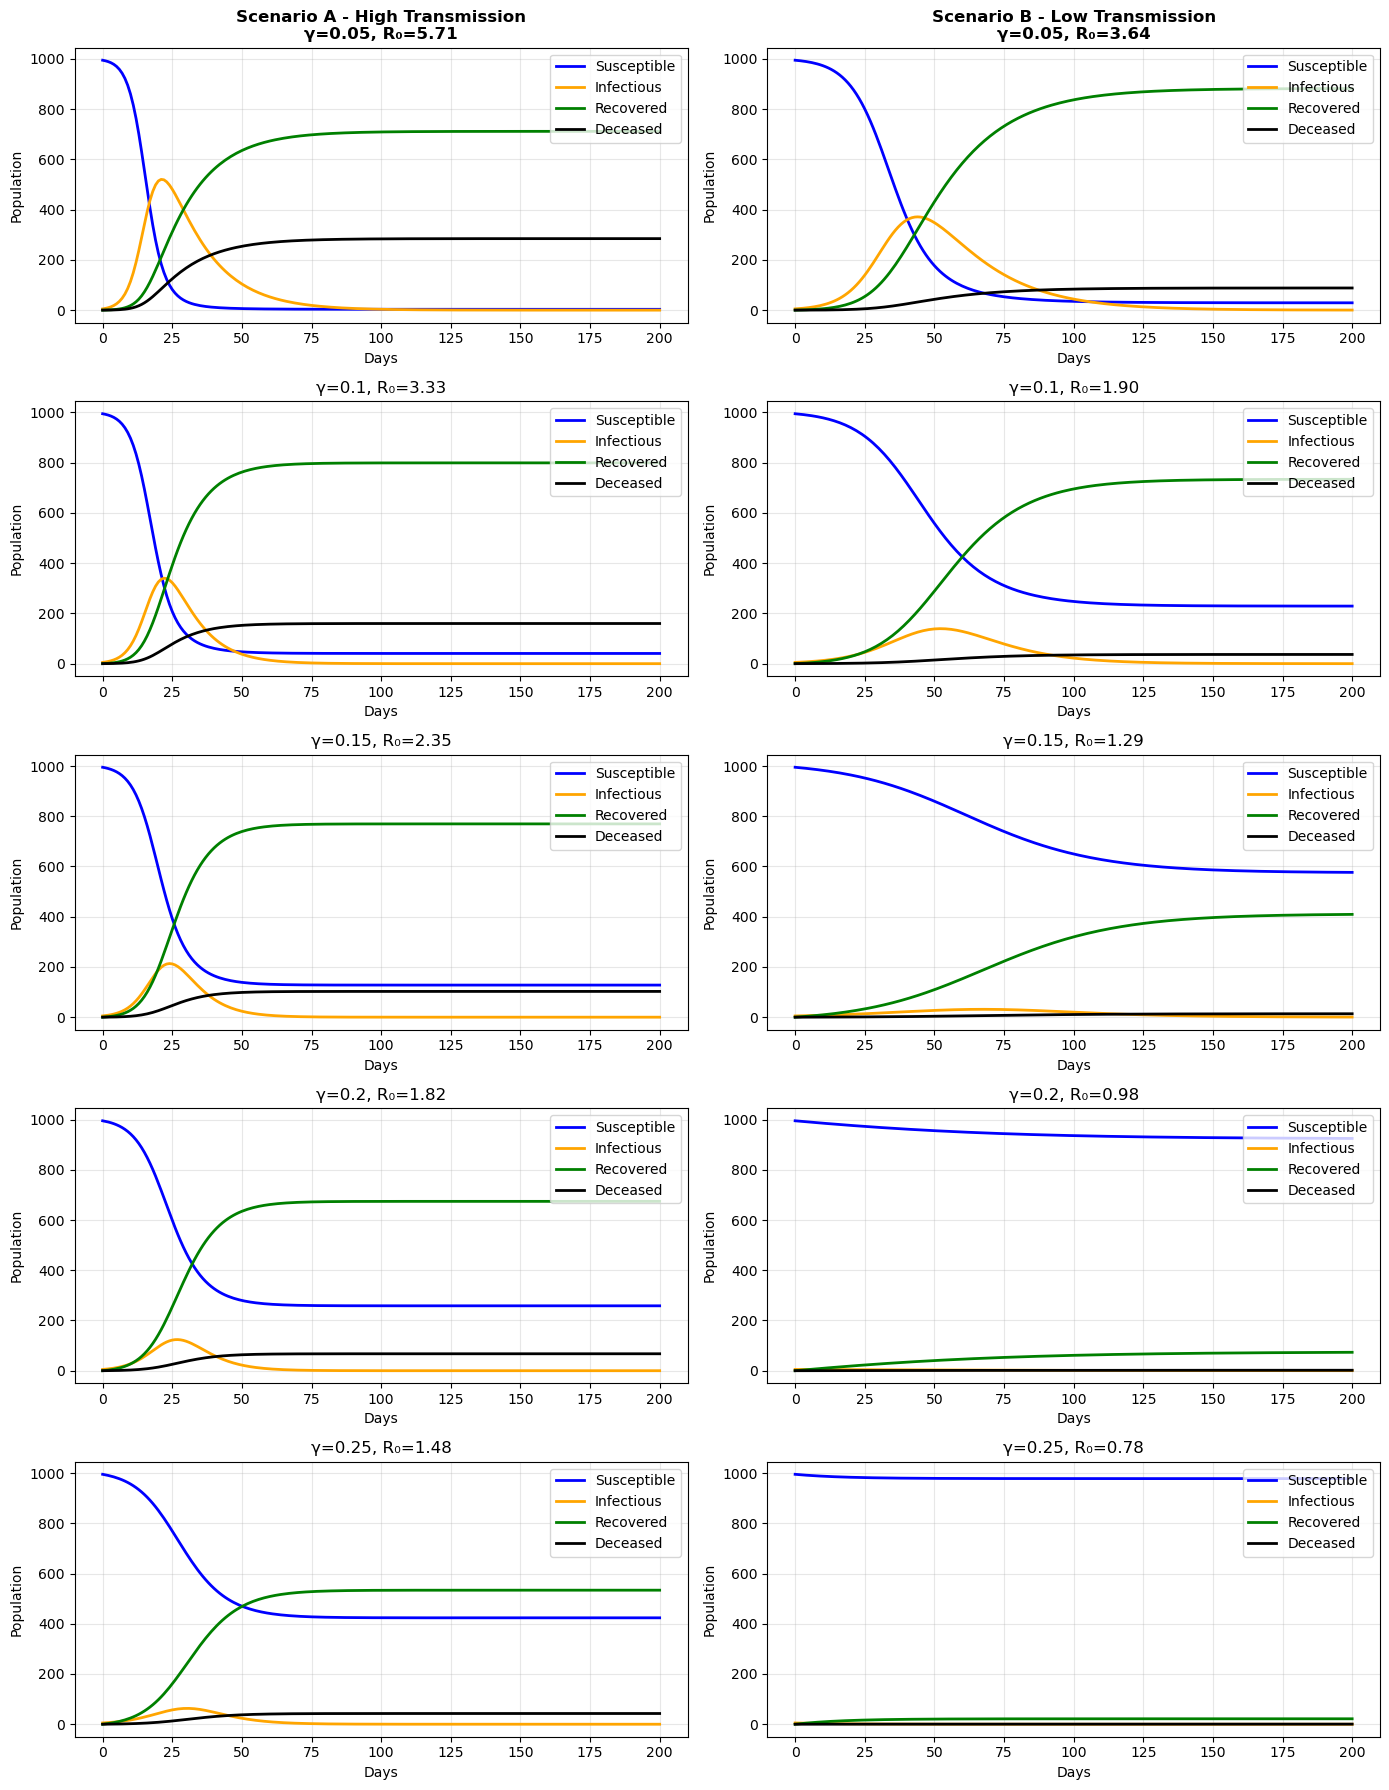

In [135]:
def comapre_transmission_rates(params1, params2):
    """
    Parameters:
    ----------
    params1 : parameters for the scenario 1 - {'beta': float, 'mu': float, 'N': int, 'I0': int, 'simulation_days': int, 'title' : string}
    params2 : parameters for the scenario 2 - {'beta': float, 'mu': float, 'N': int, 'I0': int, 'simulation_days': int, 'title' : string}

    Return:
    -------
    void (display a comparison graph)
    """
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
    fig, axes = plt.subplots(5, 2, figsize=(14, 18))
    
    results1, results2 = [], []
    scenarios = [(params1, params1['title'], results1, 0), (params2, params2['title'], results2, 1)] 
    
    for params, name, results_list, col in scenarios: # we loop through the two scenarios to create appriopiate graphs
        S0 = params['N'] - params['I0'] #params['parameter_name'] gets the value of the inputed parameter, f.e. N, beta or I0
        y0 = [S0, params['I0'], 0, 0]
        t = np.linspace(0, params['simulation_days'], params['simulation_days'] + 1)
        
        for i, gamma in enumerate(gamma_values):
            sol = odeint(sird_model, y0, t, args=(params['beta'], gamma, params['mu'])) # we use the same model as in Part 1, this time only to create the graphs
            S, I, R, D = sol.T
            
            peak_infected = np.max(I)
            peak_day = np.argmax(I)
            total_deaths = D[-1]
            final_recovered = R[-1]
            R0 = params['beta'] / (gamma + params['mu'])
            
            axes[i, col].plot(t, S, label='Susceptible',color="blue", linewidth=2)
            axes[i, col].plot(t, I, label='Infectious', color="orange", linewidth=2)
            axes[i, col].plot(t, R, label='Recovered',color="green", linewidth=2)
            axes[i, col].plot(t, D, label='Deceased', color="black",linewidth=2)
            
            
            if i == 0:  # we only add the title for the first graph for both scenarios
                axes[i, col].set_title(f'{name}\nγ={gamma}, R₀={R0:.2f}', fontweight='bold')
            else: # others are just gamma and reproduction number values
                axes[i, col].set_title(f'γ={gamma}, R₀={R0:.2f}')
            
            axes[i, col].set_xlabel('Days')
            axes[i, col].set_ylabel('Population')
            axes[i, col].legend(loc='upper right')
            
            axes[i, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    
scenario_high_transmission = {
    'beta': 0.4,
    'mu': 0.02,
    'N': 1000,
    'I0': 5,
    'simulation_days': 200,
    'title': "Scenario A - High Transmission"
}
scenario_low_transmission = {
    'beta': 0.2,
    'mu': 0.005,
    'N': 1000,
    'I0': 5,
    'simulation_days': 200,
    'title': "Scenario B - Low Transmission"
}

comapre_transmission_rates(scenario_high_transmission, scenario_low_transmission)

## Analysis

The plots presented above display the SIRD model curves for different recovery rates γ in two scenarios - High Transmission and Low Transmission. The scenario, which is the most damaging for the public health is the high transmission scenario, with a transmission rate beta = 0.4. The reason for that is that, the disease quickly spreads from the infected individuals to the susceptible ones in the entire population. This means that there are more people infected at the same time, causing a significant increase in the peak number of infected individuals. 

Such a situation is dangerous for the general public, not only because of the higher risk of getting infected with the disease, but also because it can be overwhelming the healhcare system's capacity, making it much harder to take care of so many infected individuals simultaneously. This reduces the quality of the provided service, which effects can be observed, by for instance comparing the number of total deaths for each of the recovery rates. For the high transmission scenario with beta = 0.4, the maximum was 285 deaths for γ = 0.05, whereas for the low transmisson (beta=0.2) it was only 88 deaths for the same gamma. Additionally, the peak number of infected people, for the high transmission scenario was noted to be 521 for γ = 0.05, whereas for the second scenario it was only 371, for the identical recovery rate. 

Therefore, increasing the transmission rate causes more susceptible individuals to get infected, resulting in a quicker and larger disease outbreak (scenario A). This in turn overwhelms the public healthcare system and makes it much harder to properly take care of the infectious individuals, resulting in more deaths. On the other hand, a lower transmission rate makes the disease outbreak smaller and more manageable, allowing the healthcare system to take better care of infected individuals, resulting in a significantly lower death count (scenario B). 

# Part 3: Policy Recommendations

## 3.1 Parameter impact analysis

## 3.2 Intervention analysis

## 3.3 Real-world application

# Conclusions